# Inspect model performance on test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spatialnet.trajectory import TrajectoryGenerator
from spatialnet.fileio import load_run, load_params, load_checkpoint
from spatialnet.parameters import print_params
from spatialnet.visualize import plot_position_estimate

## Load model

In [2]:
# Directory where model is loaded from
RUN_DIRNAME = '20220524_01'
RUN_DIRPATH = f'../models/{RUN_DIRNAME}'

# Load model and parameters
run_params, model = load_run(RUN_DIRPATH)
print_params(run_params)

model:
  n_units: 100
  output_bias: false
  rnn_bias: true
num_batches: 1000
num_epochs: 8
test_batch_size: 500
trainer:
  batch_size: 500
  lambda_h: 10.0
  lambda_w: 10.0
  learning_rate: 0.0001
trajectory:
  boundary_height: 2.0
  boundary_shape: square
  coordinates: cartesian
  mean_speed: 0.2
  n_steps: 450
  rng_seed: 999
  std_norm: 0.5
  time_step: 0.1



## Run model on simulated trajectories

In [3]:
# Parameters
N_TRIALS = 20
RNG_SEED = 1665

# Use trajectory generator with different random seed than test data
tparams = dict(run_params['trajectory'], rng_seed=RNG_SEED)
tgen = TrajectoryGenerator(**tparams)

# Sample batch
vel, pos = tgen.smp_batch(N_TRIALS)

# Run model on all trials
pos_est, u_vals = model.run_np(vel)

## Plot results

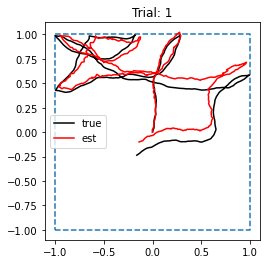

In [4]:
trial_plt = 1
t_start = 0
t_stop = 450

pos_plt = pos[trial_plt][t_start:t_stop]
pos_est_plt = pos_est[trial_plt][t_start:t_stop]

fig, ax = plt.subplots(1, 1)
ax.set_title(f'Trial: {trial_plt}')
plot_position_estimate(tgen.boundary, pos_plt, pos_est_plt, ax)

plt.savefig(f'{RUN_DIRNAME}_performance_{trial_plt}.png')